In [161]:
! pip install emoji

  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234925 sha256=73b9e0d3eb53a634699a050d9f02b62bf69936f3d3b04b71aa6facd66b87a694
  Stored in directory: c:\users\hinat\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [162]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
import emoji

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")
import os


from sklearn.model_selection import train_test_split

In [143]:
from palettable.colorbrewer.qualitative import Pastel1_7
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [189]:
df= pd.read_csv('df_combined_binary.csv')

In [190]:
dummy= pd.get_dummies(df["class"])

In [191]:
df_data=pd.concat((df['text'],dummy),axis=1)

In [192]:
df_data.dropna(inplace=True)
df_data.isna().sum().sum()

0

In [193]:
X=pd.DataFrame(df_data['text'])
y=pd.DataFrame(df_data.drop(['text'],axis=1))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [154]:
X_cat=pd.DataFrame(df['text'])
y_cat=pd.DataFrame(df['class'])

# Split the data into train and test

In [194]:
Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 0)

In [195]:
train= pd.concat((Xcat_train,ycat_train),axis=1)
test=pd.concat((Xcat_test,ycat_test),axis=1)

In [196]:
train.describe()

,text,class
count,11993,12000
unique,11992,4
top,white trash = white person procreating with a ...,not_hate
freq,2,5977


# EDA
## Distribution of classes

In [197]:
temp = train.groupby('class').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,class,text
2,not_hate,5970
1,implicit_hate,2027
0,explicit_hate,2009
3,offensive,1987


In [198]:
fig = go.Figure(go.Funnelarea(
    text =temp['class'],
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Class Distribution"}
    ))
fig.show()

In [310]:
category_count = df['class'].value_counts()

categories = category_count.index

In [311]:
category_count.index

Index(['not_hate', 'explicit_hate', 'implicit_hate', 'offensive'], dtype='object')

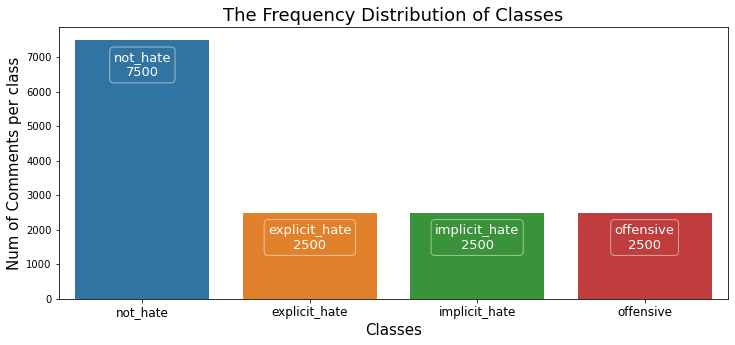

In [315]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count  )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Classes', size = 15)

plt.ylabel('Num of Comments per class', size= 15)

plt.xticks(size = 12)

plt.title("The Frequency Distribution of Classes" , size = 18)

plt.show()

## Number of words in text

In [199]:
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train.head()

,text,class,Num_word_text
13136,.@Arbys I’m a consumer too. I don’t jump on Tw...,not_hate,45
3536,let me know when you're ready to saddle up and...,implicit_hate,25
10296,@OldManRo you should check it out... it aint a...,not_hate,15
2137,"RT @Mitchellharri: Dont be a faggot, cover you...",explicit_hate,24
14775,MAGA -- consumer confidence pops in August to ...,not_hate,15


### Distribution of Number of words in the text

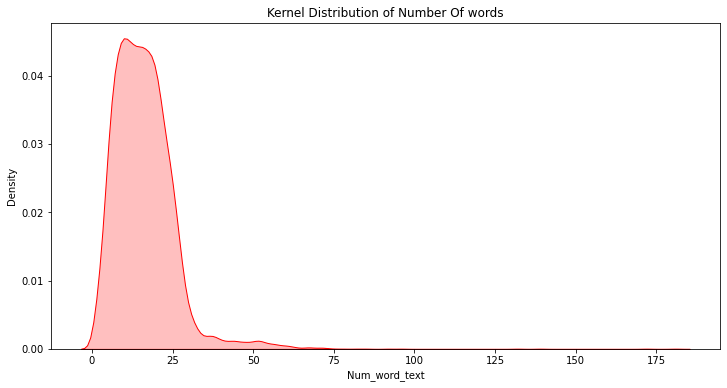

In [200]:
# Check distribtion of number of words 
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')

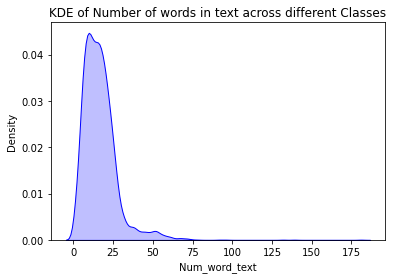

In [201]:
p1=sns.kdeplot(train[train['class']=='not_hate']['Num_word_text'], shade=True, color="b").set_title('KDE of Number of words in text across different Classes')


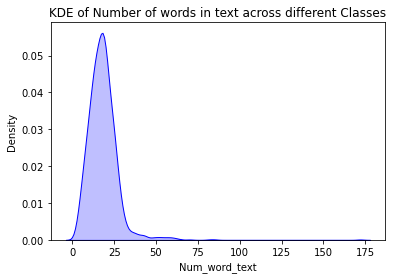

In [202]:
p1=sns.kdeplot(train[train['class']=='implicit_hate']['Num_word_text'], shade=True, color="b").set_title('KDE of Number of words in text across different Classes')


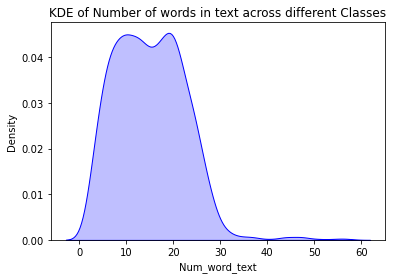

In [203]:
p1=sns.kdeplot(train[train['class']=='explicit_hate']['Num_word_text'], shade=True, color="b").set_title('KDE of Number of words in text across different Classes')


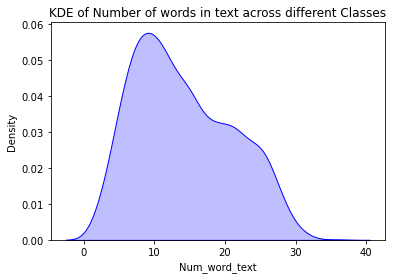

In [204]:
p1=sns.kdeplot(train[train['class']=='offensive']['Num_word_text'], shade=True, color="b").set_title('KDE of Number of words in text across different Classes')


### Distribution of Number of words per class

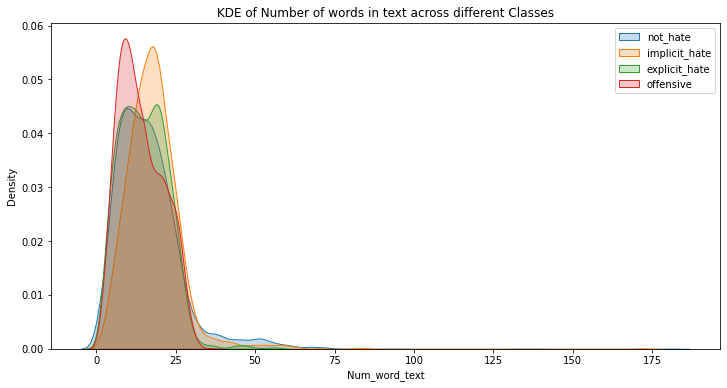

In [205]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['class']=='not_hate']['Num_word_text'], shade=True).set_title('KDE of Number of words in text across different Classes')
p2=sns.kdeplot(train[train['class']=='implicit_hate']['Num_word_text'], shade=True)
p3=sns.kdeplot(train[train['class']=='explicit_hate']['Num_word_text'], shade=True)
p4=sns.kdeplot(train[train['class']=='offensive']['Num_word_text'], shade=True)
plt.legend(labels=['not_hate','implicit_hate','explicit_hate','offensive'])

Hence the number of words in the sentences are usually between 0- 50 , however only a small number of sentences contain number of words as high as 175
offensive -> number of words between 0 - 40 , with highest distribution of 10 words and comparatively lower dit. for 20 to 30 words
explicit hate -> number of words between 0 - 60 , with highest distribution between 0 to 30 words
implicit and not hate tend to contain high number of words in the text. Major portion of distribution however lies for word count less than 50 

# Clean the corpus

- Make text lowercase, 
- remove text in square brackets,
- remove links,
- punctuation
- remove words containing numbers.

In [206]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text= text.replace("'"," ")
    text = text.replace('"',' ')
    text= text.replace('...',' ')
    text= text.replace('&',' ')
    text= text.replace("rt "," ")
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text= emoji.demojize(text)
    return text
    

## remove stop-words

In [207]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [208]:
train['text'] = train['text'].apply(lambda x:clean_text(x))

In [209]:
train.head()

,text,class,Num_word_text
13136,arbys i’m a consumer too i don’t jump on twitt...,not_hate,45
3536,let me know when youre ready to saddle up and ...,implicit_hate,25
10296,oldmanro you should check it out it aint anima...,not_hate,15
2137,mitchellharri dont be a faggot cover your mou...,explicit_hate,24
14775,maga consumer confidence pops in august to hi...,not_hate,15


## Find most common words in corpus

In [210]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [211]:
train.head()

,text,class,Num_word_text,temp_list1
13136,arbys i’m a consumer too i don’t jump on twitt...,not_hate,45,"[arbys, i’m, consumer, don’t, jump, twitter, b..."
3536,let me know when youre ready to saddle up and ...,implicit_hate,25,"[let, know, youre, ready, saddle, dig, ditches..."
10296,oldmanro you should check it out it aint anima...,not_hate,15,"[oldmanro, check, aint, animated, charlie, mur..."
2137,mitchellharri dont be a faggot cover your mou...,explicit_hate,24,"[mitchellharri, dont, faggot, cover, mouth, fk..."
14775,maga consumer confidence pops in august to hi...,not_hate,15,"[maga, consumer, confidence, pops, august, hig..."


In [212]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,bitch,1001
2,people,943
3,like,918
4,dont,621
5,im,563
6,trash,492
7,black,490
8,get,482
9,hate,441
10,one,422


In [213]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [214]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Common words according to class

In [215]:
not_hate = train[train['class']=='not_hate']
implicit_hate = train[train['class']=='implicit_hate']
explicit_hate = train[train['class']=='explicit_hate']
offensive = train[train['class']=='offensive']

In [216]:
#MosT common not_hate words
top = Counter([item for sublist in not_hate['temp_list1'] for item in sublist])
temp_not_hate = pd.DataFrame(top.most_common(20))
temp_not_hate.columns = ['Common_words','count']
#temp_not_hate.style.background_gradient(cmap='Greens')

#MosT common implicit_hate  words
top = Counter([item for sublist in implicit_hate['temp_list1'] for item in sublist])
temp_implicit_hate = pd.DataFrame(top.most_common(20))
temp_implicit_hate.columns = ['Common_words','count']

#MosT common explicit_hate  words
top = Counter([item for sublist in explicit_hate['temp_list1'] for item in sublist])
temp_explicit_hate = pd.DataFrame(top.most_common(20))
temp_explicit_hate.columns = ['Common_words','count']

#MosT common offensive  words
top = Counter([item for sublist in offensive['temp_list1'] for item in sublist])
temp_offensive = pd.DataFrame(top.most_common(20))
temp_offensive.columns = ['Common_words','count']

In [217]:
fig = px.treemap(temp_not_hate, path=['Common_words'], values='count',title='Tree of Most Common Words for class not_hate')
fig.show()

In [218]:
fig = px.treemap(temp_implicit_hate, path=['Common_words'], values='count',title='Tree of Most Common Words for class implicit_hate')
fig.show()

In [219]:
fig = px.treemap(temp_explicit_hate, path=['Common_words'], values='count',title='Tree of Most Common Words for class explicit_hate')
fig.show()

In [220]:
fig = px.treemap(temp_offensive, path=['Common_words'], values='count',title='Tree of Most Common Words for class offensive')
fig.show()

### Count of unique words 

In [221]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [222]:
def words_unique(cls,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train['class'] != cls]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train['class'] == cls]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [223]:
Unique_not_hate= words_unique('not_hate', 20, raw_text)
Unique_implicit_hate= words_unique('implicit_hate', 20, raw_text)
Unique_explicit_hate= words_unique('explicit_hate', 20, raw_text)
Uniqueoffensive= words_unique('offensive', 20, raw_text)

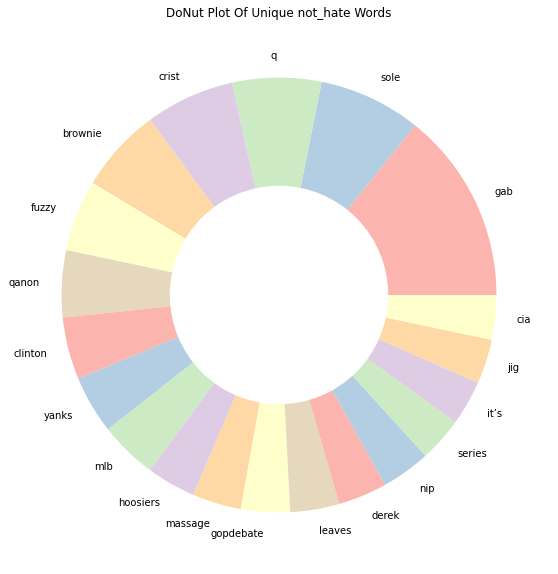

In [252]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.5, color='white')
plt.pie(Unique_not_hate['count'], labels=Unique_not_hate.words, colors=Pastel1_7.hex_colors)
#figure.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique not_hate Words')
plt.show()

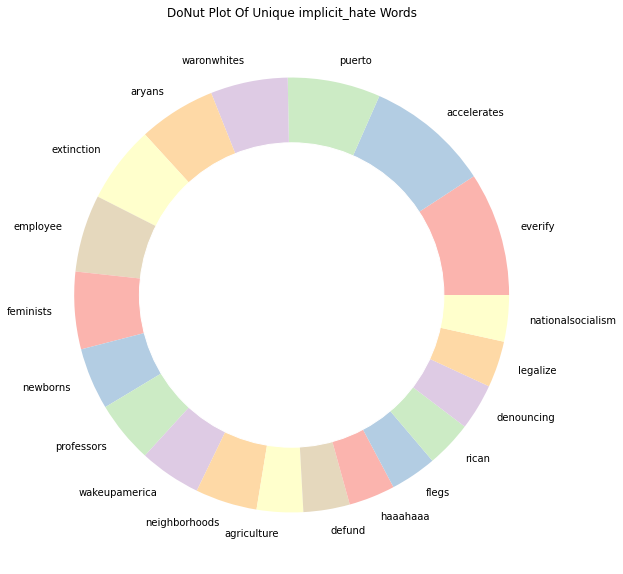

In [249]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_implicit_hate['count'], labels=Unique_implicit_hate.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique implicit_hate Words')
plt.show()

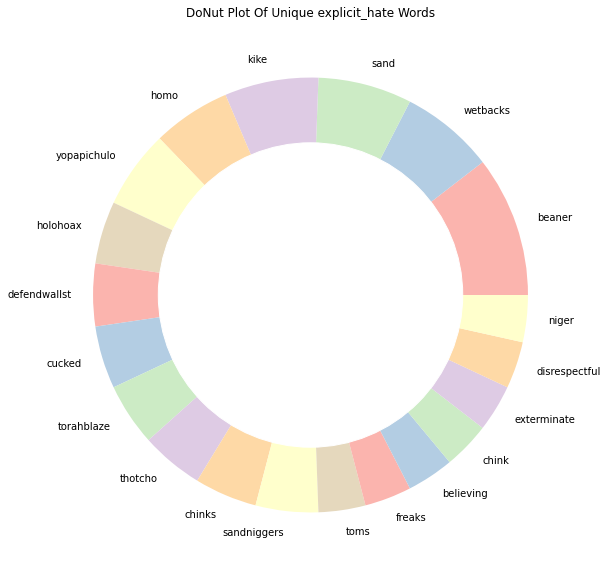

In [229]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_explicit_hate['count'], labels=Unique_explicit_hate.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique explicit_hate Words')
plt.show()

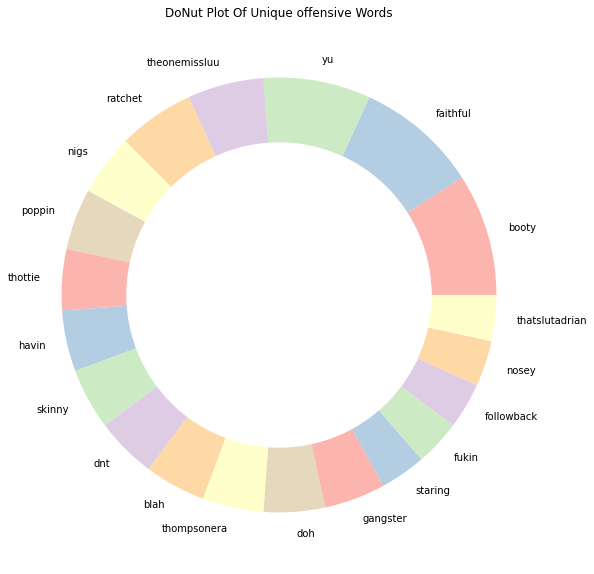

In [230]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Uniqueoffensive['count'], labels=Uniqueoffensive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique offensive Words')
plt.show()

In [240]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
              1, 1)
fig.add_trace(go.Pie(labels=Unique_explicit_hate, values=Unique_explicit_hate['count'], name="exp_hate",textinfo='label'),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

#fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Uniques counts per Class",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show()

# subplots of unique words in every class

In [245]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=Unique_explicit_hate, values=Unique_explicit_hate['count'], name="exp_hate",textinfo='label'),
              1, 1)
fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
              1, 2)
fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="no_hate", textinfo='label'),
              2, 1)
fig.add_trace(go.Pie(labels=Unique_implicit_hate, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label'),
              2, 2)             

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

#fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Uniques counts per Class",
    width =900,
    height= 600,
    showlegend=False,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
                 dict(text='imp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
                dict(text='not_hate', x=0.83, y=0.5, font_size=20, showarrow=False)
                 ])
        
fig.show()

In [293]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
#fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
#fig = plt.figure(16,20)
fig.add_trace(go.Pie(labels=Unique_explicit_hate.words, values=Unique_explicit_hate['count'], name="exp_hate",textinfo='label+percent',insidetextorientation='radial',insidetextfont_size=12.5),1,1)
#fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
#              1, 2)
#fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="no_hate", textinfo='label'),
#              2, 1)
#fig.add_trace(go.Pie(labels=Unique_implicit_hate, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label'),
#              2, 2)             

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout (width=650,height=650,showlegend=False,annotations=[dict(text='exp_hate', x=0.5, y=0.5, font_size=20, showarrow=False)])

#fig.update_traces(hole=.4)

#fig.update_layout(
#    title_text="Uniques counts per Class",
    #width =1290,
    #height= 760,
 #   showlegend=False,
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
    #             dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #             dict(text='imp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #            dict(text='not_hate', x=0.83, y=0.5, font_size=20, showarrow=False)
    #             ])
        
fig.show()

In [300]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
#fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
#fig = plt.figure(16,20)
fig.add_trace(go.Pie(labels=Unique_implicit_hate.words, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label+percent',insidetextorientation='radial',insidetextfont_size=11),1,1)
#fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
#              1, 2)
#fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="no_hate", textinfo='label'),
#              2, 1)
#fig.add_trace(go.Pie(labels=Unique_implicit_hate, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label'),
#              2, 2)             

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout (width=650,height=650,showlegend=False,annotations=[dict(text='imp_hate', x=0.5, y=0.5, font_size=20, showarrow=False)])

#fig.update_traces(hole=.4)

#fig.update_layout(
#    title_text="Uniques counts per Class",
    #width =1290,
    #height= 760,
 #   showlegend=False,
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
    #             dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #             dict(text='imp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #            dict(text='not_hate', x=0.83, y=0.5, font_size=20, showarrow=False)
    #             ])
        
fig.show()

In [301]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
#fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
#fig = plt.figure(16,20)
fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="not_hate",textinfo='label+percent',insidetextorientation='radial',insidetextfont_size=12.5),1,1)
#fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
#              1, 2)
#fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="no_hate", textinfo='label'),
#              2, 1)
#fig.add_trace(go.Pie(labels=Unique_implicit_hate, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label'),
#              2, 2)             

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout (width=650,height=650,showlegend=False,annotations=[dict(text='not_hate', x=0.5, y=0.5, font_size=20, showarrow=False)])

#fig.update_traces(hole=.4)

#fig.update_layout(
#    title_text="Uniques counts per Class",
    #width =1290,
    #height= 760,
 #   showlegend=False,
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
    #             dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #             dict(text='imp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #            dict(text='not_hate', x=0.83, y=0.5, font_size=20, showarrow=False)
    #             ])
        
fig.show()

In [303]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
#fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
#fig = plt.figure(16,20)
fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive",textinfo='label+percent',insidetextorientation='radial',insidetextfont_size=12),1,1)
#fig.add_trace(go.Pie(labels=Uniqueoffensive.words, values=Uniqueoffensive['count'], name="offensive", textinfo='label'),
#              1, 2)
#fig.add_trace(go.Pie(labels=Unique_not_hate.words, values=Unique_not_hate['count'], name="no_hate", textinfo='label'),
#              2, 1)
#fig.add_trace(go.Pie(labels=Unique_implicit_hate, values=Unique_implicit_hate['count'], name="imp_hate",textinfo='label'),
#              2, 2)             

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout (width=650,height=650,showlegend=False,annotations=[dict(text='offensive', x=0.5, y=0.5, font_size=20, showarrow=False)])

#fig.update_traces(hole=.4)

#fig.update_layout(
#    title_text="Uniques counts per Class",
    #width =1290,
    #height= 760,
 #   showlegend=False,
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='offensive', x=0.17, y=0.5, font_size=20, showarrow=False),
    #             dict(text='exp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #             dict(text='imp_hate', x=0.83, y=0.5, font_size=20, showarrow=False),
    #            dict(text='not_hate', x=0.83, y=0.5, font_size=20, showarrow=False)
    #             ])
        
fig.show()

# Word cloud 

In [132]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im","rt"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

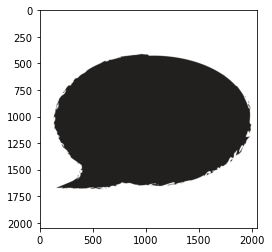

In [109]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
pos_mask = np.array(Image.open('comment.png'))
plt.imshow(pos_mask)
#plot_wordcloud(not_hate.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Nt hate words")

In [99]:
not_hate

,text,class,Num_word_text,text_clean,temp_list1
13136,.@Arbys I’m a consumer too. I don’t jump on Tw...,not_hate,45,arbys i’m a consumer too i don’t jump on twitt...,"[.@Arbys, I’m, consumer, too., I, don’t, jump,..."
10296,@OldManRo you should check it out... it aint a...,not_hate,15,oldmanro you should check it out it aint anima...,"[@OldManRo, check, out..., aint, animated, Cha..."
14775,MAGA -- consumer confidence pops in August to ...,not_hate,15,maga consumer confidence pops in august to hi...,"[MAGA, --, consumer, confidence, pops, August,..."
10575,RT @amoz1939: drinking\nto the last drop\nwash...,not_hate,11,rt drinkingto the last dropwashing teapot hai...,"[RT, @amoz1939:, drinking, last, drop, washing..."
11938,only my school wouldnt give kids their schedul...,not_hate,9,only my school wouldnt give kids their schedul...,"[school, wouldnt, give, kids, schedules..., #g..."
...,...,...,...,...,...
9225,"but even if "" hate "" "" is really meaningful ...",not_hate,19,but even if hate is really meaningful ha...,"[even, "", hate, "", "", really, meaningful, hate..."
14019,"Follow THAT with THIS and the MUELLER ""Witch H...",not_hate,52,follow that with this and the mueller witch hu...,"[Follow, THAT, THIS, MUELLER, ""Witch, Hunt"", l..."
13123,"Kofi Annan, the former UN secretary-general wh...",not_hate,20,kofi annan the former un secretarygeneral who ...,"[Kofi, Annan,, former, UN, secretary-general, ..."
9845,"you think the "" white race "" "" is "" "" on the...",not_hate,26,you think the white race is on the rope...,"[think, "", white, race, "", "", "", "", ropes, "", ..."


TypeError: Invalid shape (510, 626, 2) for image data

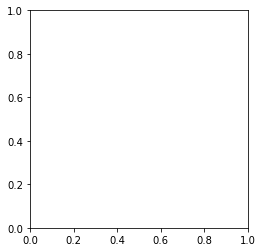

In [112]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
pos_mask = np.array(Image.open('twitter_mask.png'))
plt.imshow(pos_mask)
#plot_wordcloud(explicit_hate.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of explicit hate words")

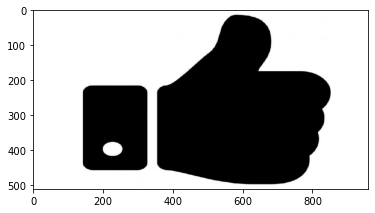

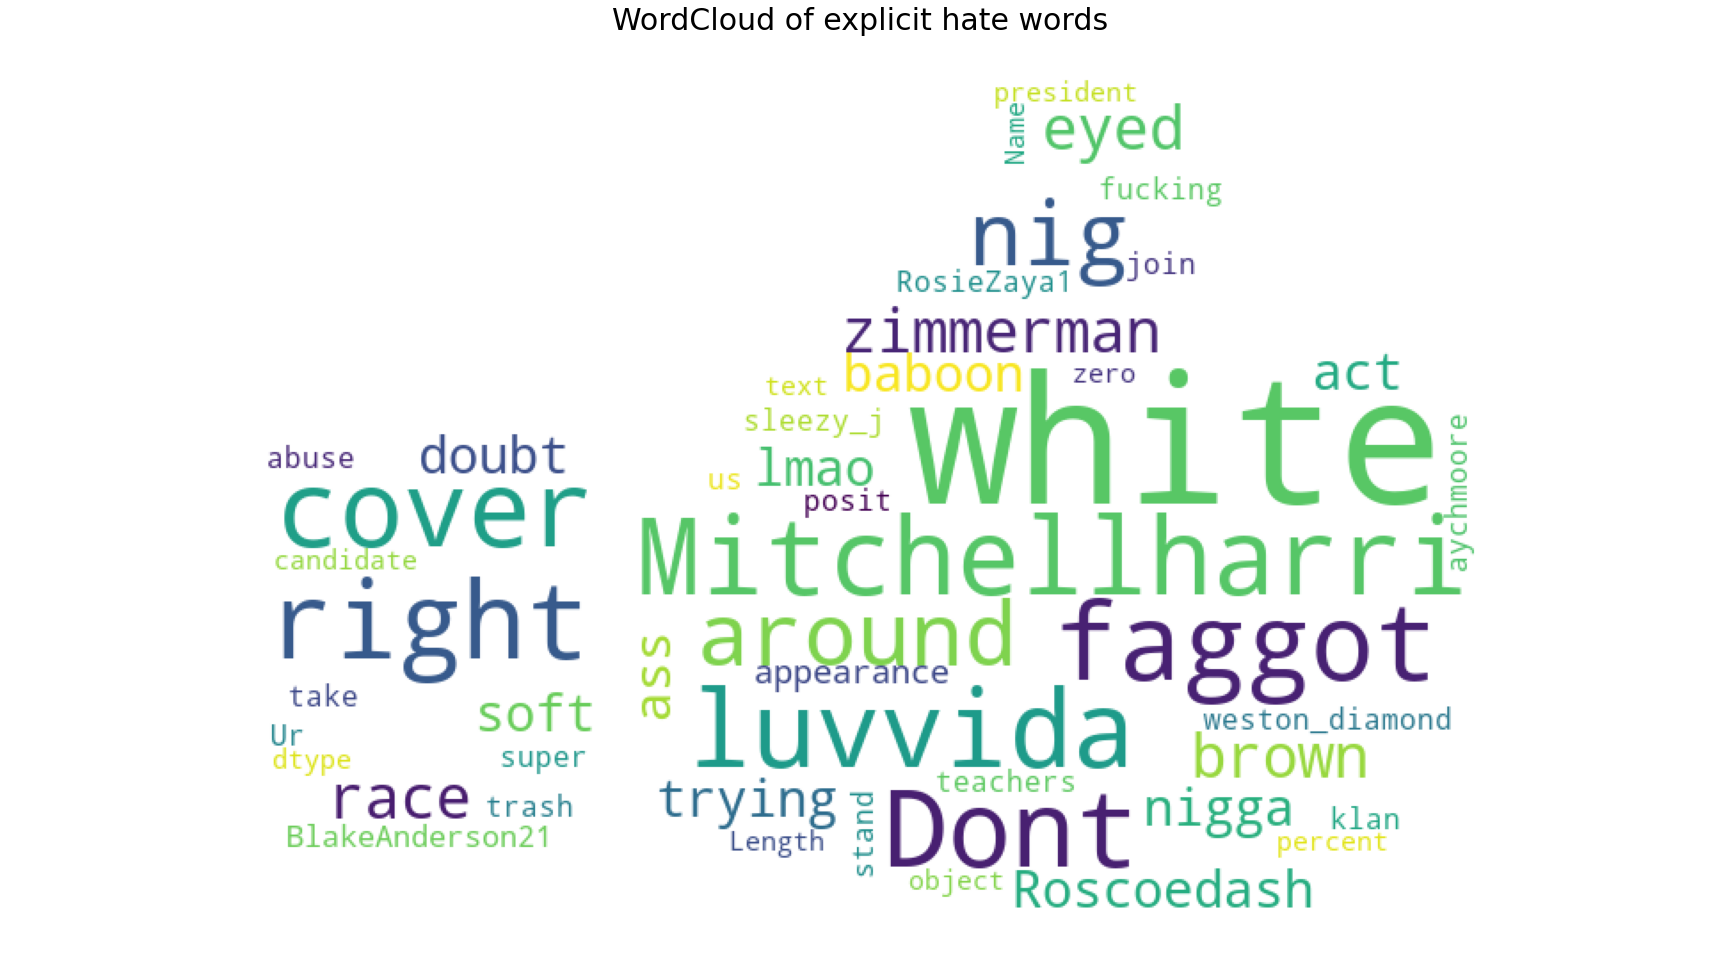

In [134]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
#pos_mask = np.array(Image.open('upvote.png')).resize((960,512))

pos_mask= Image.open('upvote.png')
pos_mask =pos_mask.resize((960,512),resample=0)
pos_mask=np.array(pos_mask)

plt.imshow(pos_mask)
plot_wordcloud(explicit_hate.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of explicit hate words")

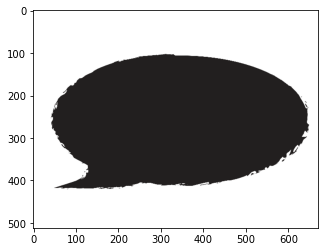

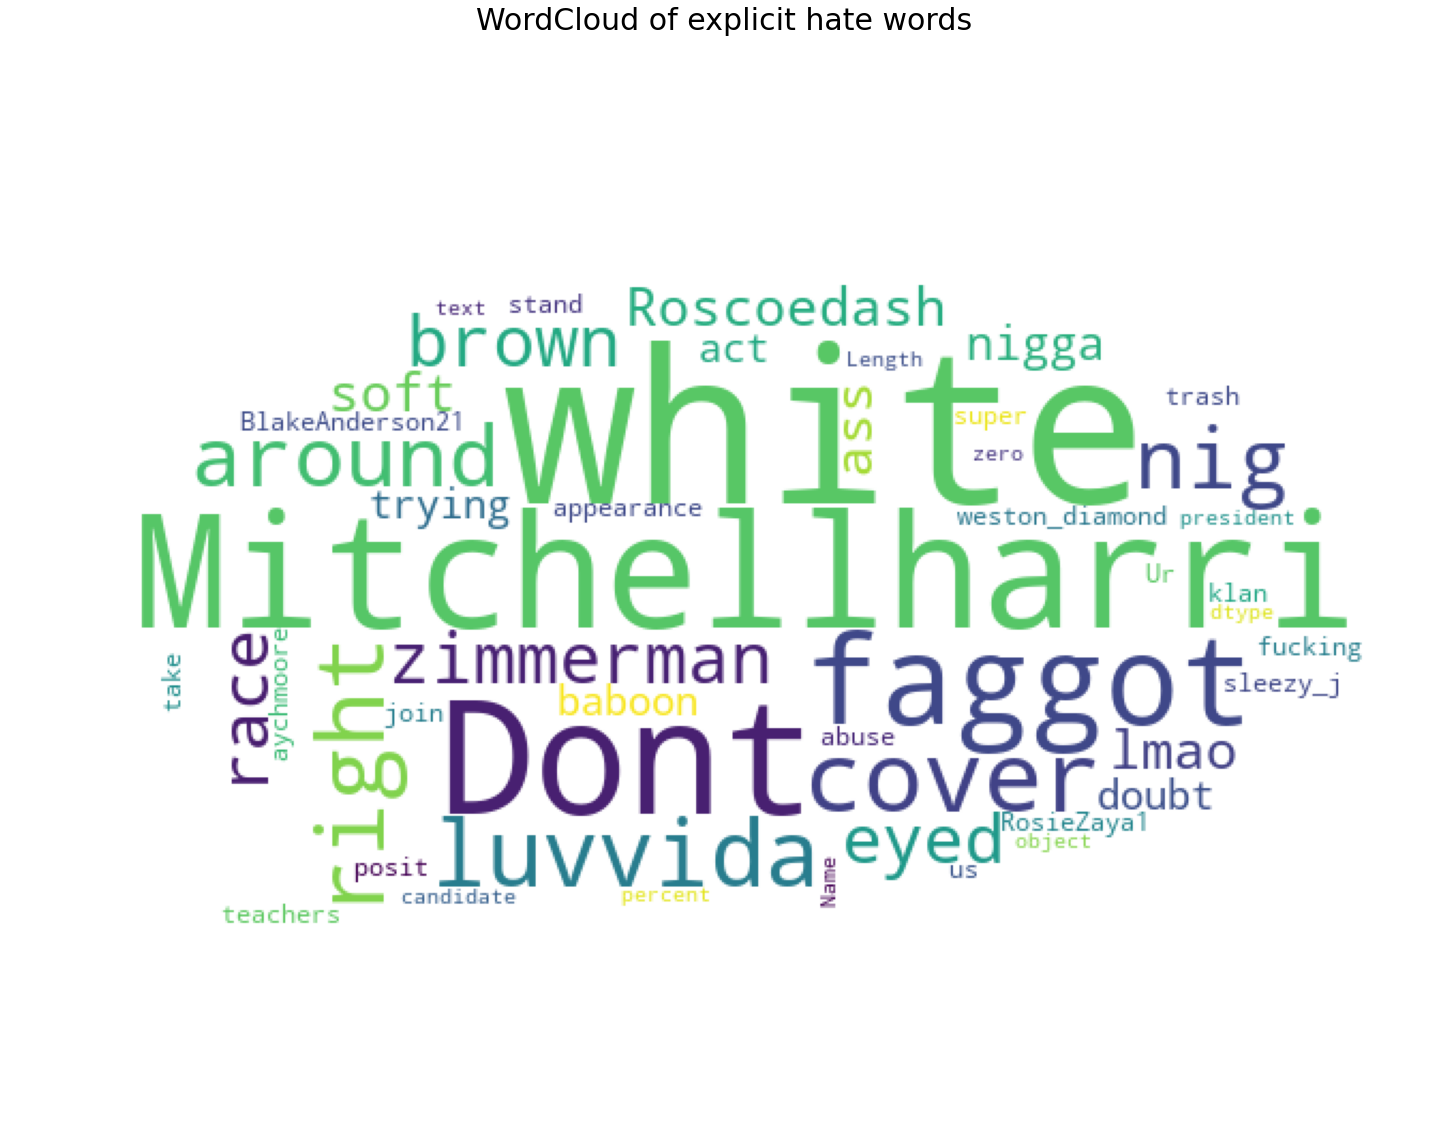

In [138]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
#pos_mask = np.array(Image.open('upvote.png')).resize((960,512))

pos_mask= Image.open('comment.png')
pos_mask =pos_mask.resize((670,512),resample=0)
pos_mask=np.array(pos_mask)

plt.imshow(pos_mask)
plot_wordcloud(explicit_hate.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of explicit hate words")

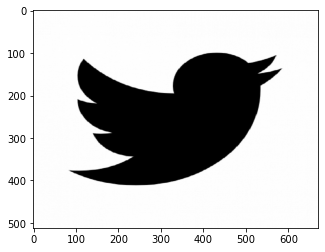

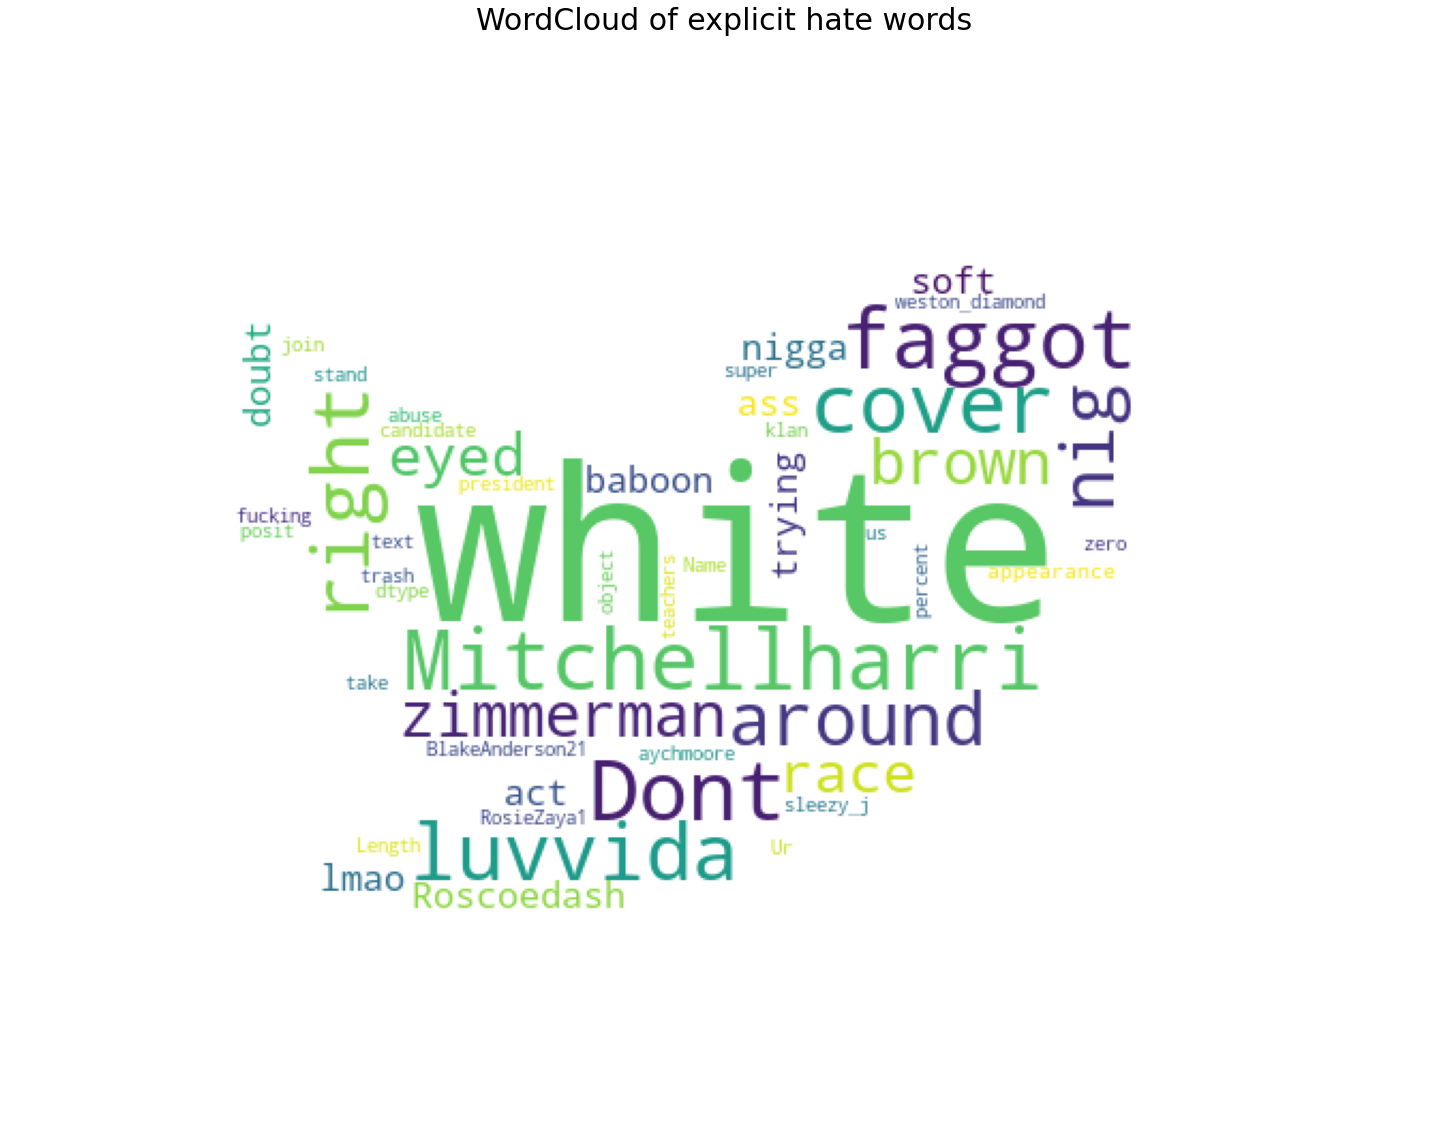

In [140]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
#pos_mask = np.array(Image.open('upvote.png')).resize((960,512))

pos_mask= Image.open('twitter_mask.jpg')
pos_mask =pos_mask.resize((670,512),resample=0)
pos_mask=np.array(pos_mask)

plt.imshow(pos_mask)
plot_wordcloud(explicit_hate.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of explicit hate words")